## Kütüphaneler

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Veri Ön İşleme

### Veri yükleme

In [31]:
veriler = pd.read_csv("../veri/satislar.csv")
veriler.head(3)

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5


### Veri ön işleme

In [32]:
veriler.columns

Index(['Aylar', 'Satislar'], dtype='object')

In [33]:
aylar = veriler[["Aylar"]]
aylar.head(3)

,Aylar
0,8
1,10
2,11


In [34]:
satislar = veriler[["Satislar"]]
satislar.head(3)

,Satislar
0,19671.5
1,23102.5
2,18865.5


### Verilerin test ve eğitim için bölünmesi

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(aylar, satislar, test_size=0.33, random_state=0)

### Verilerin ölçeklenmesi

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [37]:
X_train.T, x_train.T

(array([[-0.70368853,  0.15126015, -0.63792324, -0.0460357 ,  1.33503524,
          0.80891298, -1.29557607,  2.32151449, -0.70368853, -1.03251494,
          0.48008657,  0.48008657, -0.37486211, -0.63792324,  1.66386166,
         -1.09828023, -1.42710664,  0.94044355,  0.08549487, -0.30909683]]),
        5   16  8   14  23  20  1   29  6   4   18  19  9   7   25  3   0   21  \
 Aylar  19  32  20  29  50  42  10  65  19  14  37  37  24  20  55  13   8  44   
 
        15  12  
 Aylar  31  25  )

### Model inşası

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

tahmin = lr.predict(X_test)

In [39]:
tahmin.T, Y_test.T

(array([[-1.33324088,  1.05398097, -0.65761206, -0.70265398,  0.82877136,
          0.60356175,  0.82877136, -0.70265398, -0.29727668,  0.37835214]]),
 array([[-1.66597621,  1.25819492, -0.99762385, -0.7856508 ,  1.0709181 ,
          0.81055426,  0.92122098, -1.04207705, -0.09933754,  0.52977719]]))

In [40]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

tahmin1 = lr1.predict(x_test)
tahmin1.T, y_test.T.values

(array([[20126.21865404, 57740.29412655, 30771.7117123 , 30062.01217508,
         54191.79644047, 50643.29875438, 54191.79644047, 30062.01217508,
         36449.30801003, 47094.80106829]]),
 array([[18865.5, 61195.5, 28540.5, 31609. , 58484.5, 54715.5, 56317.5,
         27897. , 41544. , 50651. ]]))

In [41]:
y_test

,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


In [42]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

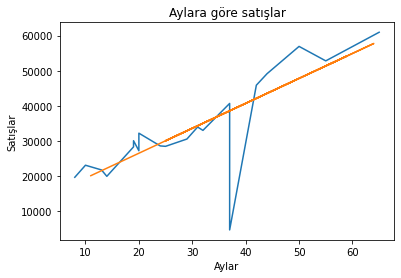

In [45]:
plt.plot(x_train, y_train)
plt.plot(x_test, tahmin1 )
plt.title("Aylara göre satışlar")
plt.xlabel("Aylar")
plt.ylabel("Satışlar")
plt.show()

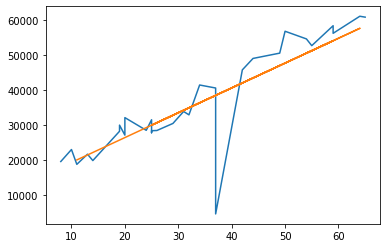

In [46]:
plt.plot(aylar, satislar)
plt.plot(x_test, tahmin1 )
plt.show()